# `epidemic-intelligence` demo

In [1]:
import epidemic_intelligence as ei
from google.oauth2 import service_account
from google.cloud import bigquery
import pandas as pd

## Creating a BigQuery client

In [2]:
credentials = service_account.Credentials.from_service_account_file('C:\\Users\\elija\\Documents\\24f-coop\\credentials.json')
project = 'net-data-viz-handbook'
# Initialize a GC client
client = bigquery.Client(credentials=credentials, project=project)

## Importation Plots
### Area Plots

In [23]:
table_name = 'importation_data.h1n1_proper_agg'
reference_table = 'reference.gleam-geo-map'
source_geo_level = 'continent_label'  # Geographic level for source filtering
target_geo_level = 'continent_label'        # Geographic level for target filtering
output_resolution = 'country_name'      # Geographic level for output

source_values = ['Asia']
target_values = ['Europe']      
domestic = False
cutoff = 0.05

In [24]:
fig = ei.area_plot(client=client, table_name=table_name, reference_table=reference_table,
                               source_geo_level=source_geo_level, target_geo_level=target_geo_level, output_resolution=output_resolution,
                               source_values=source_values, target_values=target_values, domestic=domestic, cutoff=cutoff, 
                               display='source', )

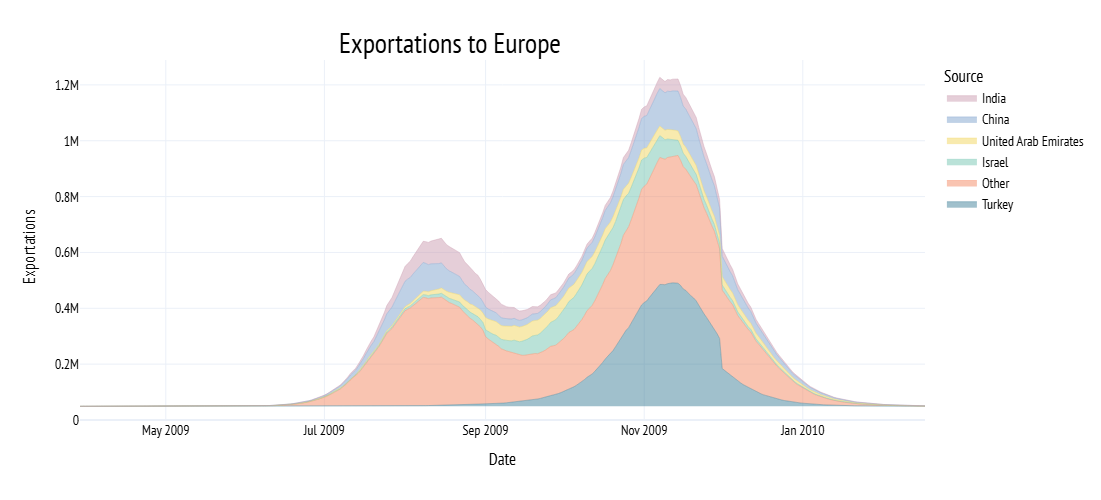

In [25]:
fig.update_layout(width=900, height=500, # dimensions
                  title_text = 'Exportations to Europe', # changing title
                  font_family = 'PT Sans Narrow'
                 )
fig.show()

In [27]:
fig.layout

Layout({
    'font': {'family': 'PT Sans Narrow'},
    'height': 500,
    'legend': {'title': {'text': 'Source'}, 'tracegroupgap': 0, 'traceorder': 'reversed'},
    'margin': {'t': 60},
    'template': '...',
    'title': {'text': 'Exportations to Europe'},
    'width': 900,
    'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'Date'}},
    'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'Exportations'}}
})

In [6]:
ei.fetch_area_plot_data(fig)

,Turkey,Other,Israel,United Arab Emirates,China,India
2009-03-29,1.0,NaN,NaN,NaN,NaN,NaN
2009-04-20,1.0,NaN,1.0,NaN,NaN,NaN
2009-04-29,1.0,1.0,4.0,NaN,1.0,NaN
2009-04-30,2.0,5.0,5.0,NaN,NaN,NaN
2009-05-01,2.0,3.0,4.0,4.0,3.0,NaN
...,...,...,...,...,...,...
2009-04-18,NaN,NaN,1.0,NaN,NaN,NaN
2009-04-21,NaN,NaN,1.0,NaN,NaN,NaN
2009-04-23,NaN,NaN,2.0,1.0,NaN,NaN
2009-04-28,NaN,NaN,5.0,1.0,NaN,NaN


In [7]:
import plotly.express as px
px.area(ei.fetch_area_plot_data(fig), template=ei.templates.netsi)

### Sankey and Relative Risk

In [8]:
table_name = "net-data-viz-handbook.importation_data.h1n1_proper_agg"
reference_table = 'reference.gleam-geo-map'

source_geo_level = "continent_label"  # This could also be "region_id" or other levels
source_values = ['Asia']  
source_resolution = "country_name"

target_geo_level = "continent_label"  # Could be "country_id", "region_label", etc.
target_values = ["Europe"]  # Regions to filter on
target_resolution = 'region_label'

date_range = ["2009-10-01", "2009-10-31"]  # The date range for the data
cutoff = 0.08  # Threshold for categorizing regions
domestic = False

In [9]:
sfig = ei.sankey(client=client, table_name=table_name, reference_table=reference_table, 
                                                source_geo_level=source_geo_level, target_geo_level=target_geo_level, 
                                                source_values=source_values, target_values=target_values, 
                                                source_resolution=source_resolution, target_resolution=target_resolution,
                                                date_range=date_range, cutoff=cutoff, domestic=domestic, n_sources=5, n_targets=None)
sfig

In [10]:
sfig.update_layout(width=800, height=400, font_family='PT Sans Narrow', title='October 2010: Asia to Europe')
sfig

In [11]:
fig = ei.relative_risk(client, table_name, reference_table, source_geo_level, 
                                target_geo_level, source_values, target_values, 
                                date_range=date_range, cutoff=0.0, n=15, 
                                target_resolution='country_name', domestic=True, 
                                title='Relative Risk of Importation', xlabel='Relative Risk of Importation')
fig.update_layout(width=700, height=500, font_family='PT Sans Narrow')
fig

In [12]:
# pip install --upgrade -i https://test.pypi.org/simple/ epidemic-intelligence;

In [13]:
# pip install db-dtypes google-cloud-bigquery google-cloud-bigquery-storage kaleido plotly matplotlib pandas

## Boxplots
### Fixed-time

In [14]:
# required
table = 'sri_data.SIR_0_basins_prevalence'
reference_table = 'reference.gleam-geo-map'

org_geography = 'basin_id'
geography = 'basin_label' # default to org_geography
geography_value = 'Portland(US-ME)' # default to None
target = 'Susceptible_18_23'
# date_range = ['2009-07-01', '2010-03-01'] # defaults to None
confidence=.95

# Set parameters for grouping
num_clusters = 1  # Example number of clusters, defaults to 1
num_features = 10   # Set the number of features to select, defaults to 10?
grouping_method = 'mse' # 'mse' or 'abc', defaults to 'mse'
centrality_method = 'mse' # 'mse', 'abc', or 'mbd', defaults to 'mbd'

dataset = 'eli' # defaults to None
delete_data = True # defaults to True

In [15]:
fig = ei.fixed_time_boxplot(client, table, reference_table, target, 
                       org_geography, geography, geography_value, 
                       date_range=None, 
                       num_clusters=num_clusters, num_features=num_features, grouping_method='mse', 
                       dataset=dataset, delete_data=True, 
                       confidence=.95, full_range = False, outlying_points = True, date='iso', )

Dataset `net-data-viz-handbook.eli` already exists. Any tables in it may be overwritten.


Enter "CONFIRM" if you wish to proceed:  CONFIRM


BigQuery dataset `net-data-viz-handbook.eli` removed successfully, or it did not exist.


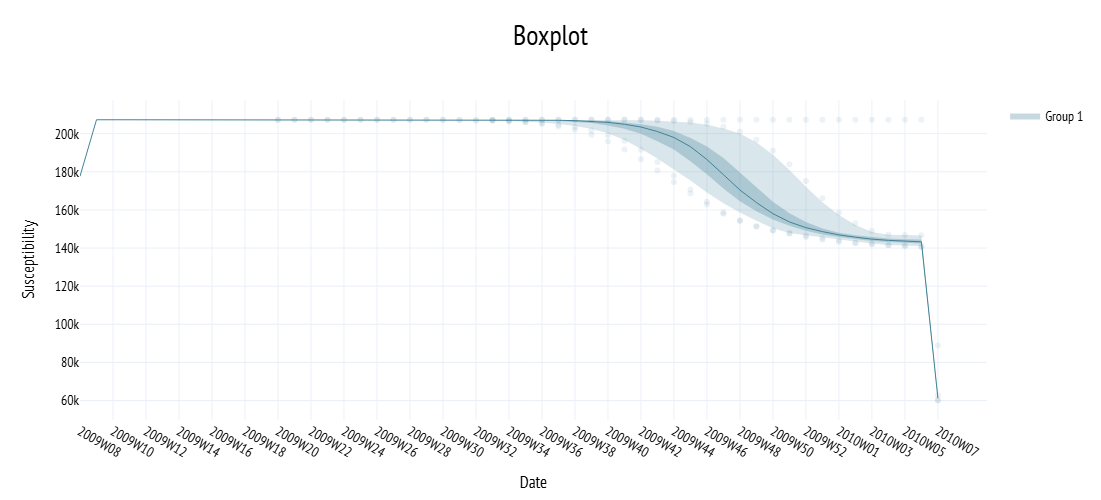

In [16]:
fig.update_layout(width=900, height=500, showlegend=True, font_family='PT Sans Narrow', title='Boxplot',)
fig

In [17]:
fig.data

(Scatter({
     'legendgroup': '1',
     'line': {'width': 0},
     'marker': {'color': '#444'},
     'mode': 'lines',
     'name': 'Minimum',
     'showlegend': False,
     'x': array(['2009W08', '2009W09', '2009W10', ..., '2010W07', '2010W07', '2010W07'],
                dtype=object),
     'y': array([177684.   , 207298.   , 207298.   , ...,  60349.125,  60349.125,
                  60349.125])
 }),
 Scatter({
     'fill': 'tonexty',
     'fillcolor': 'rgba(66, 130, 153, 0.2)',
     'legendgroup': '1',
     'line': {'width': 0},
     'marker': {'color': '#444'},
     'mode': 'lines',
     'name': 'Middle 95.0%',
     'showlegend': False,
     'x': array(['2009W08', '2009W09', '2009W10', ..., '2010W07', '2010W07', '2010W07'],
                dtype=object),
     'y': array([177684.  , 207298.  , 207298.  , ...,  62816.25,  62816.25,  62816.25])
 }),
 Scatter({
     'legendgroup': '1',
     'line': {'width': 0},
     'marker': {'color': '#444'},
     'mode': 'lines',
     'name': 'Mini

## Functional

In [18]:
fig = ei.functional_boxplot(client, table, reference_table, target, 
                       org_geography, geography, geography_value, 
                       date_range, 
                       num_clusters=2, num_features=15, grouping_method=grouping_method, centrality_method='mse',
                       dataset=dataset, delete_data=False, )

Dataset `net-data-viz-handbook.eli` created.


In [19]:
fig.update_layout(width=900, height=500, showlegend=True, font_family='PT Sans Narrow', title='Functional Boxplot', yaxis_title='Susceptibility')

## This needs cleaning, requires renaming traces 

In [20]:
def fetch_functional_data(fig):
    data_dict = dict()
    df = pd.DataFrame()
    for trace in fig.data:
        t_series = pd.DataFrame({trace.name: trace.y}, index=trace.x)
        df = pd.concat([df, t_series], axis=1)

    return df

In [21]:
fetch_functional_data(fig)

,Group 2 Outlier,Group 2 Outlier,Group 2 Outlier,Group 2 Outlier,Group 2 Outlier,Group 2 Outlier,Group 2 Outlier,Group 1 Lower Bound,Group 1 Upper Bound,Group 1 Lower Quartile,Group 1,Group 1 Median,Group 2 Lower Bound,Group 2 Upper Bound,Group 2 Lower Quartile,Group 2,Group 2 Median
2009-02-17,29614,29614,29614,29614,29614,29614,29614,29614,29614,29614,29614,29614,29614,29614,29614,29614,29614
2009-02-18,29614,29614,29614,29614,29614,29614,29614,29614,29614,29614,29614,29614,29614,29614,29614,29614,29614
2009-02-19,29614,29614,29614,29614,29614,29614,29614,29614,29614,29614,29614,29614,29614,29614,29614,29614,29614
2009-02-20,29614,29614,29614,29614,29614,29614,29614,29614,29614,29614,29614,29614,29614,29614,29614,29614,29614
2009-02-21,29614,29614,29614,29614,29614,29614,29614,29614,29614,29614,29614,29614,29614,29614,29614,29614,29614
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2010-02-13,20434,20736,20306,20314,20453,20365,20649,29614,29614,29614,29614,29614,20067,20949,20067,20842,20352
2010-02-14,20428,20735,20299,20302,20441,20348,20649,29614,29614,29614,29614,29614,20064,20946,20064,20841,20352
2010-02-15,20420,20732,20294,20296,20431,20320,20646,29614,29614,29614,29614,29614,20060,20944,20060,20840,20344
2010-02-16,20409,20732,20290,20282,20423,20298,20646,29614,29614,29614,29614,29614,20053,20942,20053,20839,20342


fig.data